
# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies released between 1960 and 2015. Collected from The Movie Database (TMDb), it also includes user ratings and popularities. This report aims at conducting exploratory data analysis to answer the questions below:

+ Question 1: Who are the top grossing directors, actors(top biling cast) in each genre?
+ Question 2: How have popularities of different genres changed over the years? 
+ Question 3: What was the distribution for release days in terms of month and day of the week? Are there patterns for highly grossing films?

In [2]:
# Set up import statements for packages that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

First, load the data and inspect basic information including data types, columns, values and missing data.

In [3]:
pd.set_option('display.max_columns', 50) #to display all columns in the output
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


When the dataset was first loaded, some columns were hidden due to limited display output space. It's helpful to use `pd.set_option` to change the default setting and display all columns from the dataset for the initial inspection.

Notice that several columns contain multiple values in the same cell separated by "|". To answer the questions of interest, we need to expand each cell in the `genres` column to multiple rows with one genre per row associated with the film id. We also need to extract the first cast name from each cell in the `cast` column to identify the lead actor of each film.

There are also some columns that are irrelevant to the analysis I'm interested in, therefore can be dropped during data cleaning.

Next, I'll further assess the dataset to determine more potential problems that need to be addressed before the analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The summary above presents some potential problems with the dataset including: several columns include missing data, dates and years are not in date format.

Let's take a clearer look at the columns with missing data.

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

I also want to take a quick look at the descriptive statistics to get a general idea on the dataset.

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The minimum `budget` and `revenue` are both 0, which can also be seen as missing data. We'll drop these rows during cleaning.

The maximum of runtime doesn't seem to make sense for a film. Let's take a further look.

In [7]:
df.loc[df['runtime'] == df.runtime.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


On a further look, the maximum running time belongs to _The Story of Film: An Odyssey_. According to Wikipedia, it is "a documentary film about the history of film, presented on television in 15 one-hour chapters with a total length of over 900 minutes." So it is not erroneous data!

Last, let's check duplicates.

In [8]:
df.duplicated().sum()

1

In [9]:
df.loc[df.duplicated(keep=False)==True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The dataset also contains two exactly same entries, one of which will need to be droped.

### Data Cleaning 

Based on the assessment above and the questions I'd like to explore, the following cleaning steps need to performed:
+ Drop irrelevant columns
+ Drop rows with missing data
+ Deduplicate
+ Fix `release_date` datatype 
+ Extract `year`, `month`, `day_of_week` from `release_date`
+ Extract first actor name in the `cast` column
+ Normalize `genres` data seperated by '|'
+ Add `profit_adj` and `ROI_adj` columns

#### Drop Irrelevant Columns

In [10]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id','homepage','tagline','keywords','overview','runtime','production_companies','vote_count','vote_average'],axis=1,inplace=True)
# confirm change
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


#### Drop Rows with Missing Data

In [12]:
# drop rows that contain NA/null data
df = df.dropna()
# confirm change
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
genres            0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [13]:
# drop rows where `budget` and `revenue` are 0
df = df[(df.budget != 0) & (df.revenue != 0)]
# confirm change
df.loc[(df['budget_adj']==0) | (df['revenue_adj']==0)]

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,release_year,budget_adj,revenue_adj


#### Deduplicate

In [14]:
df.drop_duplicates(inplace=True)
# confirm change
df.duplicated().sum()

0

#### Fix `release_date` Datatype

In [15]:
# fix the `release_date` data by replacing the last two characters with the value of `release_year` data
# first, convert `release_year` datatype to string
df['release_year'] = df['release_year'].astype(str)
# confirm change
type(df['release_year'][0])

str

In [16]:
def fix_year(x):
    
    '''define function to extrat month and day from original `release_date` data 
    and concate it with `release_year` data
    '''
    
    month_day = x.release_date[:-2]
    year = x['release_year']
    date = month_day + year
    return date
# apply the function to `release_date` column
df['release_date'] = df.apply(fix_year, axis=1)
# confirm change
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,1.379999e+08,1.392446e+09


In [17]:
# drop the original `release_year` column
df.drop(['release_year'], axis=1, inplace=True)
# confirm change
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/2015,1.379999e+08,1.392446e+09


In [18]:
# last, convert datatype to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# confirm change
print(df['release_date'].dtypes)

datetime64[ns]


#### Extract `year`, `month`, `day_of_week` from `release_date`

In [19]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day_of_week'] = df['release_date'].dt.dayofweek
# confirm change
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,budget_adj,revenue_adj,release_year,release_month,release_day_of_week
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1


#### Extract First Actor Name in the `cast` Column

In [20]:
df['leading_actor'] = df['cast'].str.split('|').str[0]
# confirm change
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,budget_adj,revenue_adj,release_year,release_month,release_day_of_week,leading_actor
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt


In [21]:
# drop the original `cast` column
df.drop(['cast'],axis=1,inplace=True)
# confirm change
df.head(1)

,id,popularity,budget,revenue,original_title,director,genres,release_date,budget_adj,revenue_adj,release_year,release_month,release_day_of_week,leading_actor
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt


#### Normalize `genres` Data Seperated by '|'

In [22]:
# split values in the `genres` column by '|' and expand each genre to a new column, pivot the columns to indices,
# then reset the index to the first column and rename the column to 'genre'

df_genre = df['genres'].str.split('|', expand=True)\
                              .stack()             \
                              .reset_index(level=0)\
                              .set_index('level_0')\
                              .rename(columns={0:'genre'})
df_genre.head(10) # confirm change

,genre
level_0,
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action
1,Adventure
1,Science Fiction
1,Thriller
2,Adventure


In [23]:
# join `genre` column with the original dataframe on index
df = df_genre.join(df.drop('genres',1),how='left')
# confirm change
df.head(10)

,genre,id,popularity,budget,revenue,original_title,director,release_date,budget_adj,revenue_adj,release_year,release_month,release_day_of_week,leading_actor
0,Action,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt
0,Adventure,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt
0,Science Fiction,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt
0,Thriller,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt
1,Action,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,2015-05-13,1.379999e+08,3.481613e+08,2015,5,2,Tom Hardy
1,Adventure,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,2015-05-13,1.379999e+08,3.481613e+08,2015,5,2,Tom Hardy
1,Science Fiction,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,2015-05-13,1.379999e+08,3.481613e+08,2015,5,2,Tom Hardy
1,Thriller,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,2015-05-13,1.379999e+08,3.481613e+08,2015,5,2,Tom Hardy
2,Adventure,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,2015-03-18,1.012000e+08,2.716190e+08,2015,3,2,Shailene Woodley
2,Science Fiction,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,2015-03-18,1.012000e+08,2.716190e+08,2015,3,2,Shailene Woodley


During EDA, I noticed that some values in the `director` column also contains '|'. So we'll fix it here as well.

In [24]:
# use the same technique to split and stack multiple director to seperate rows
df_dir = df['director'].str.split('\|', expand=True)\
                              .stack()             \
                              .reset_index(level=0)\
                              .set_index('level_0')\
                              .rename(columns={0:'director'})
'\|' in df['director'] # confirm change

False

In [25]:
# join `director` column with the original dataframe on index
df = df_dir.join(df.drop('director',1),how='left')
'\|' in df['director'] # confirm change

False

In [26]:
# the methods created some duplicates so we'll deduplicate again
df.drop_duplicates(inplace=True)
# confirm change
df.duplicated().sum()

0

#### Add `profit_adj` and `ROI_adj` Columns

In [27]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df['ROI_adj'] = df['profit_adj'] / df['budget_adj']
# confirm new columns are created and calculations are correct
df.head(1)

,director,genre,id,popularity,budget,revenue,original_title,release_date,budget_adj,revenue_adj,release_year,release_month,release_day_of_week,leading_actor,profit_adj,ROI_adj
0,Colin Trevorrow,Action,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt,1.254446e+09,9.090192


In [28]:
# save the cleaned dataset to a new file
df.to_csv('df_cleaned.csv',index=False)
# load cleaned dataset
df_cleaned = pd.read_csv('df_cleaned.csv')
df_cleaned.head()

,director,genre,id,popularity,budget,revenue,original_title,release_date,budget_adj,revenue_adj,release_year,release_month,release_day_of_week,leading_actor,profit_adj,ROI_adj
0,Colin Trevorrow,Action,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt,1.254446e+09,9.090192
1,Colin Trevorrow,Adventure,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt,1.254446e+09,9.090192
2,Colin Trevorrow,Science Fiction,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt,1.254446e+09,9.090192
3,Colin Trevorrow,Thriller,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,1.379999e+08,1.392446e+09,2015,6,1,Chris Pratt,1.254446e+09,9.090192
4,George Miller,Action,76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,1.379999e+08,3.481613e+08,2015,5,2,Tom Hardy,2.101614e+08,1.522909


In [29]:
# inspect the cleaned dataset
df_cleaned.describe()

,id,popularity,budget,revenue,budget_adj,revenue_adj,release_year,release_month,release_day_of_week,profit_adj,ROI_adj
count,11182.000000,11182.000000,1.118200e+04,1.118200e+04,1.118200e+04,1.118200e+04,11182.000000,11182.000000,11182.000000,1.118200e+04,1.118200e+04
mean,36553.745842,1.289232,4.261653e+07,1.241055e+08,5.085862e+07,1.574636e+08,2000.921481,7.045072,3.119835,1.066049e+08,4.884727e+02
std,63170.635224,1.609993,4.590749e+07,1.967318e+08,4.850414e+07,2.377171e+08,11.424727,3.346668,1.331725,2.143964e+08,2.156251e+04
min,5.000000,0.001117,1.000000e+00,2.000000e+00,9.693980e-01,2.370705e+00,1960.000000,1.000000,0.000000,-4.139124e+08,-9.999998e-01
25%,5932.500000,0.484734,1.150000e+07,1.517148e+07,1.570863e+07,2.085655e+07,1995.000000,4.000000,2.000000,-1.841600e+06,-1.182209e-01
50%,11158.000000,0.869231,2.600000e+07,5.114266e+07,3.544753e+07,7.062427e+07,2004.000000,7.000000,3.000000,3.123140e+07,1.091854e+00
75%,35669.500000,1.499614,6.000000e+07,1.483364e+08,7.154834e+07,1.905886e+08,2010.000000,10.000000,4.000000,1.255390e+08,3.096529e+00
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,4.250000e+08,2.827124e+09,2015.000000,12.000000,6.000000,2.750137e+09,1.018618e+06


In [30]:
# inspect unique values of the new dataset
df_cleaned.nunique()

director               1781
genre                    20
id                     3849
popularity             3847
budget                  405
revenue                3750
original_title         3803
release_date           2881
budget_adj             2093
revenue_adj            3844
release_year             56
release_month            12
release_day_of_week       7
leading_actor          1425
profit_adj             3847
ROI_adj                3844
dtype: int64

In [31]:
# make sure there's no missing data in the cleaned dataset
df_cleaned.isnull().any()

director               False
genre                  False
id                     False
popularity             False
budget                 False
revenue                False
original_title         False
release_date           False
budget_adj             False
revenue_adj            False
release_year           False
release_month          False
release_day_of_week    False
leading_actor          False
profit_adj             False
ROI_adj                False
dtype: bool

In [32]:
# inspect dupliates
df_cleaned.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Q1: Who are the top grossing directors, actors(top biling cast) in each genre?

#### Is certain genre associated with higher gross and/or ROI?

In [33]:
# calculate mean gross profit for each genre using groupby
grouped_by_genre_profit = df_cleaned.groupby(by='genre')['profit_adj'].mean().reset_index()
# sort by profit from high to low
grouped_by_genre_profit.sort_values('profit_adj', ascending=False)

,genre,profit_adj
2,Animation,2.257578e+08
1,Adventure,1.958042e+08
7,Family,1.907367e+08
8,Fantasy,1.681787e+08
15,Science Fiction,1.318912e+08
0,Action,1.273553e+08
12,Music,1.002070e+08
18,War,9.768195e+07
3,Comedy,8.949903e+07
17,Thriller,8.200067e+07


In [34]:
# calculate mean ROI for each genre using groupby
grouped_by_genre_ROI = df_cleaned.groupby(by='genre')['ROI_adj'].mean().reset_index()
# sort by ROI from high to low
grouped_by_genre_ROI.sort_values('ROI_adj', ascending=False)

,genre,ROI_adj
7,Family,1896.638025
14,Romance,1492.612042
1,Adventure,1223.342964
0,Action,880.629141
6,Drama,606.957271
13,Mystery,96.421402
11,Horror,76.426588
3,Comedy,61.900579
17,Thriller,51.422713
5,Documentary,20.042414


From comparison, we can see that certain genres tend to have both high profits and high ROIs while some gernes can have one feature higher than the others in terms of ranking among all genres. For example, Animation ranks No.1 by average gross profit, however, it ranks No.15 when it comes to average ROI, probably because it's very costly to make animation films.

#### Visualize the relationship between profit and ROI of each genre.

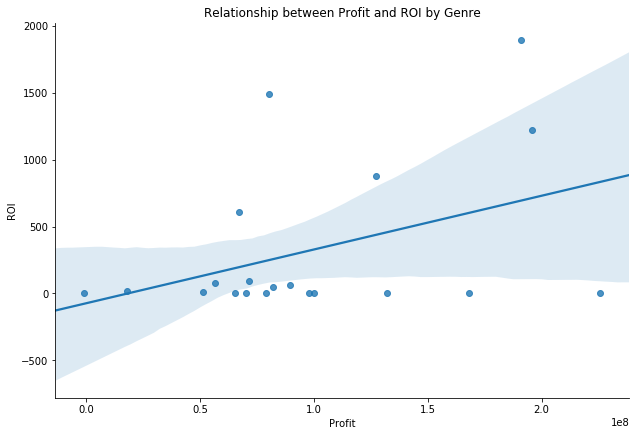

In [35]:
# group by genre and calculate average profit and ROI
grouped_by_genre = df_cleaned.groupby(by='genre')['profit_adj','ROI_adj'].mean()

# plot scatterplot of average profit and ROI with seaborn
sns.lmplot(x='profit_adj',y='ROI_adj',data=grouped_by_genre,size=6,aspect=1.5)
plt.title('Relationship between Profit and ROI by Genre')
plt.xlabel('Profit')
plt.ylabel('ROI');

From the scatterplot, we can see that most of the genres have consistent average ROIs across different average profit levels. On the other hand, a few genres manages to have much higher ROIs. 

For these genres with higher ROIs, there seems to be a positive correlation between profits and ROIs. However, since there are only 5 genres in this group, we can't be confident with this observation.

#### Which directors are associated with the highest profit in each genre?

In [36]:
def top_artists(role,col):
    
    '''The function take in the role of the artist - 'director' or 'leading_actor'
    and the column we are interested to compare - 'profit_adj' or 'ROI_adj', then 
    return a dataframe with the top artists of each genre.
    '''
    
    '''Group by genre and role'''
    df_role = df_cleaned.groupby(['genre',role],as_index=False)[col].mean()
    '''Sort values in interested column within each genre group'''
    df_role = df_role.groupby('genre',as_index=False).apply(pd.DataFrame.sort_values,col,ascending=False)
    '''Select on the the top 1 in each genre'''
    top_role = df_role.groupby('genre').head(1).reset_index(drop=True)
    return top_role

In [37]:
top_artists('director','profit_adj')

,genre,director,profit_adj
0,Action,Irwin Winkler,1.551568e+09
1,Adventure,Clyde Geronimi,1.545635e+09
2,Animation,Hamilton Luske,1.545635e+09
3,Comedy,Hamilton Luske,1.545635e+09
4,Crime,Irwin Winkler,1.551568e+09
5,Documentary,Alastair Fothergill,9.885685e+07
6,Drama,James Cameron,2.234714e+09
7,Family,Hamilton Luske,1.545635e+09
8,Fantasy,James Cameron,2.586237e+09
9,Foreign,A.R. Murugadoss,6.775543e+07


#### Which actors are associated with the highest profit in each genre?

In [38]:
top_artists('leading_actor','profit_adj')

,genre,leading_actor,profit_adj
0,Action,Mark Hamill,1.770043e+09
1,Adventure,Mark Hamill,1.770043e+09
2,Animation,Rod Taylor,1.545635e+09
3,Comedy,Rod Taylor,1.545635e+09
4,Crime,Marlon Brando,1.246626e+09
5,Documentary,Patrick Stewart,9.885685e+07
6,Drama,Linda Blair,2.128036e+09
7,Family,Henry Thomas,1.767968e+09
8,Fantasy,Henry Thomas,1.767968e+09
9,Foreign,Aamir Khan,6.775543e+07


Now we get two lists of directors and actors whose work on average have the highest gross profit in each genre. We can tell from the lists that they are most likely impacted by some of the biggest film releases in the history like Titanic, Avatar and Star Wars franchise.

To compare, we can conduct the same analysis on the ROI data.

In [39]:
top_artists('director','ROI_adj')

,genre,director,ROI_adj
0,Action,John G. Avildsen,1.018618e+06
1,Adventure,John G. Avildsen,1.018618e+06
2,Animation,John Lounsbery,5.834656e+01
3,Comedy,Angel Gracia,2.688072e+04
4,Crime,Robert Clouse,1.048824e+02
5,Documentary,Morgan Spurlock,2.188256e+02
6,Drama,John G. Avildsen,2.546840e+05
7,Family,John G. Avildsen,1.018618e+06
8,Fantasy,David Lynch,6.990000e+02
9,Foreign,A.R. Murugadoss,7.351648e+00


In [40]:
top_artists('leading_actor','ROI_adj')

,genre,leading_actor,ROI_adj
0,Action,Ralph Macchio,1.018618e+06
1,Adventure,Ralph Macchio,1.018618e+06
2,Animation,Rod Taylor,5.297000e+01
3,Comedy,Jeff Goldblum,2.938574e+04
4,Crime,Bruce Lee,1.048824e+02
5,Documentary,Morgan Spurlock,4.386166e+02
6,Drama,Ralph Macchio,5.093143e+05
7,Family,Ralph Macchio,1.018618e+06
8,Fantasy,Jack Nance,6.990000e+02
9,Foreign,Aamir Khan,7.351648e+00


The analysis on the ROI data produces two very different lists. These artists are most likely associated with works that are not neccessary high profile, but well received with relatively small budget.

### Research Q2:  How have popularities of different genres changed over the years?

#### First, let's plot overall distribution of popularity for all films

In [41]:
# select only relevant columns from the dataset
df_q2 = df_cleaned[['id','original_title','popularity']]
# drop duplicated rows
df_q2 = df_q2.drop_duplicates()
df_q2.head()

,id,original_title,popularity
0,135397,Jurassic World,32.985763
4,76341,Mad Max: Fury Road,28.419936
8,262500,Insurgent,13.112507
11,140607,Star Wars: The Force Awakens,11.173104
15,168259,Furious 7,9.335014


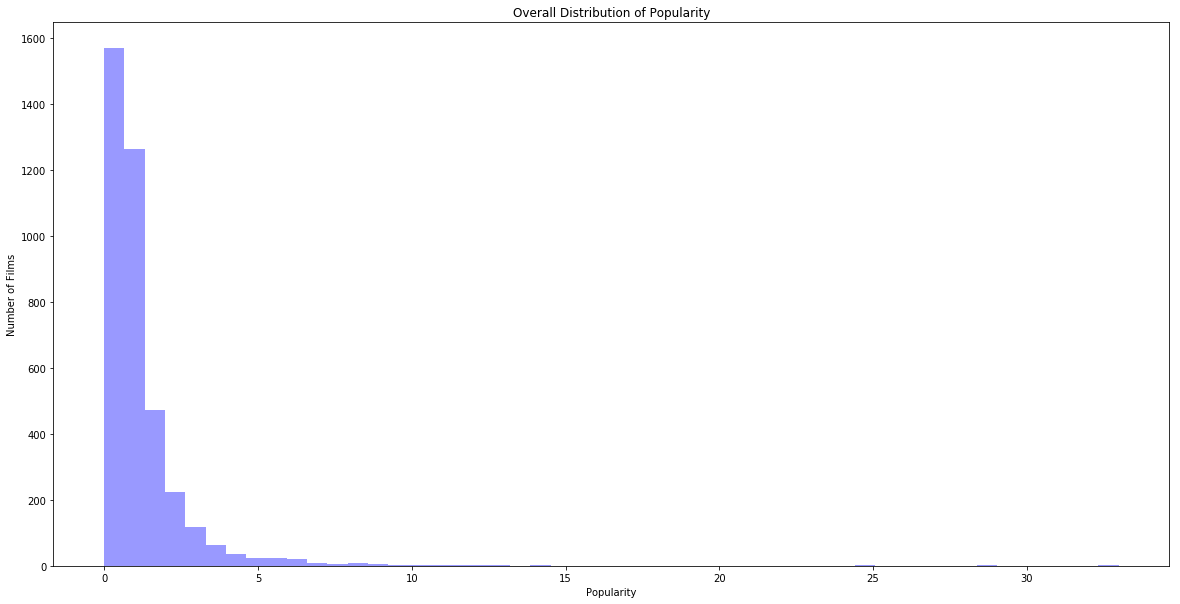

In [42]:
# plot overall distribution of popularity

figure, ax = plt.subplots(figsize=(20,10))
sns.distplot(df_q2['popularity'], kde=False, color="b")
plt.title('Overall Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Films');

We can see that majority of the films have popularities under 5. Very few of them have much higher popularities above 10. The maximum popularity is between 30 and 35.

#### Are certain genres associated with higher popularity across the years?

In [43]:
# group dataset by genre and sort by average popularity
pop_by_genre = df_cleaned.groupby('genre',as_index = False)['popularity'].mean().sort_values('popularity', ascending = False)
pop_by_genre

,genre,popularity
1,Adventure,1.886848
15,Science Fiction,1.866459
2,Animation,1.776480
8,Fantasy,1.733187
0,Action,1.591857
7,Family,1.544369
17,Thriller,1.266029
18,War,1.229622
13,Mystery,1.138169
4,Crime,1.135961


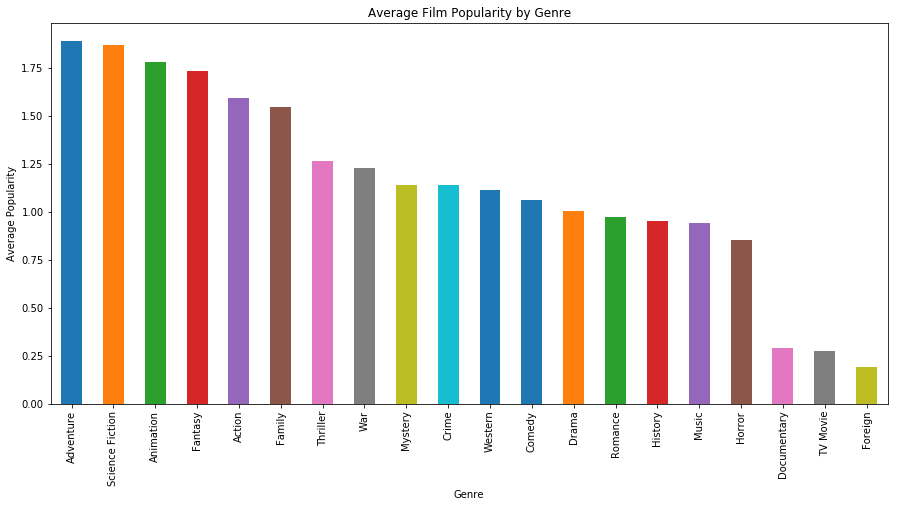

In [44]:
# plot a bar chart to visualize the average popularity among different genres
pop_by_genre.plot.bar(x='genre',y='popularity',figsize=(15,7),legend=None)
plt.title('Average Film Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity');

According to the data, films in the genres of Adventure, Science Fiction, and Animation are the most popular on average over the years, while documentaries, TV movies and foreign movies are the least popular on average. 

Is it always the case? Let's take a look at the year to year data on popularity by genre.

#### How have the average popularity of each genre changed over the years?

In [45]:
def plot_pop(df):
    
    '''define function plot_pop(df) to plot popularity data within certain dataframe using seaborn poinplot'''
    
    fig, ax = plt.subplots(figsize=(20, 10))
    g = sns.pointplot(x="release_year", y="popularity", hue="genre", data=df, legend=False)

    plt.legend(loc='upper left')
    plt.title('Popularty by Genre')
    plt.xlabel('Release Year')
    plt.ylabel('Popularity')
    loc, labels = plt.xticks()
    g.set_xticklabels(labels, rotation=45);

In [46]:
# group the dataset by `genre` and `release_year` and inspect the average `popularity` values
pop_yoy = df_cleaned.groupby(['genre','release_year'],as_index = False)['popularity'].mean()

# group the subset by `genre` and sort by `release_year`
pop_yoy = pop_yoy.groupby('genre', as_index=False).apply(pd.DataFrame.sort_values, 'release_year', ascending = True)
pop_yoy.head()

genre  release_year  popularity
0 0  Action          1960    1.504538
  1  Action          1961    0.560942
  2  Action          1962    1.055017
  3  Action          1963    0.974186
  4  Action          1964    3.153791

/Users/shiyanzhang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


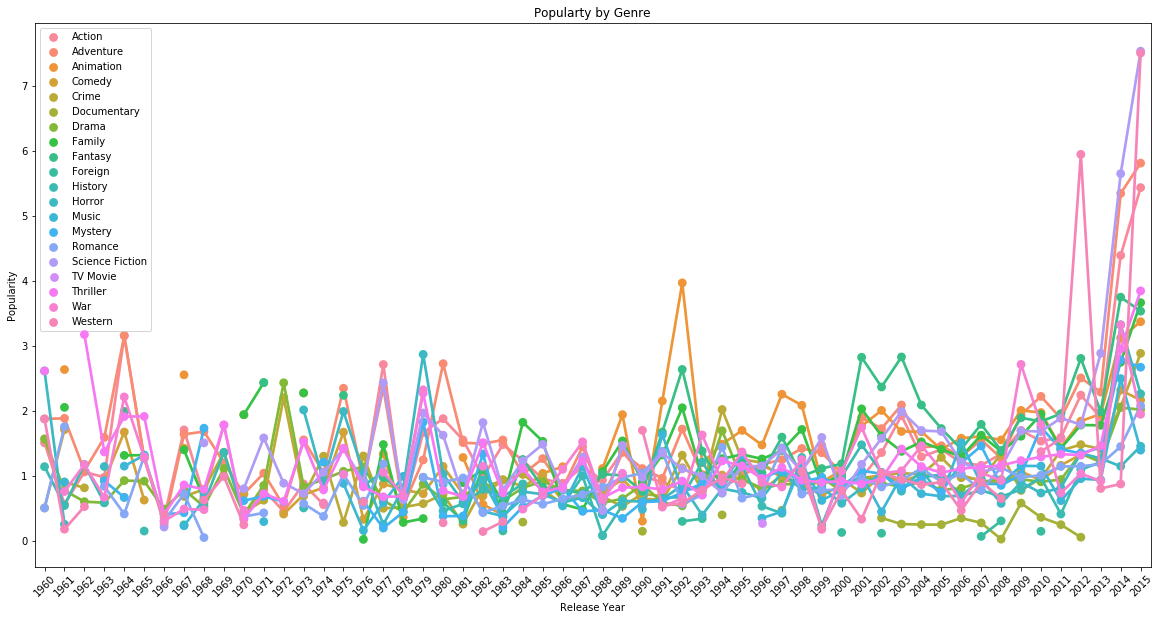

In [47]:
# plot average popularity change year over year for all genres
plot_pop(pop_yoy)

This is very hard to read as we have too many genres in one figure. However, we can still see some peaks for certain genres, possibably due to some successful individual releases around those times. 

We can also see that average popularities for most genres have been increasing since around 2010. This is probabaly because the source of this dataset, TMDB, started adding data since 2008, therefore films released after that are more relevant for the present users.

Next, let's explore some specific genres.

In [48]:
# select the 3 most and least popular genres on average and append two lists together
high_pop = pop_by_genre.head(3)
low_pop = pop_by_genre.tail(3)
genre_s = high_pop.append(low_pop)
# select rows in the `pop_yoy` dataframe where the `genre` is in the new genre list of interest
df_s = pop_yoy[pop_yoy.genre.isin(genre_s.genre)]

/Users/shiyanzhang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


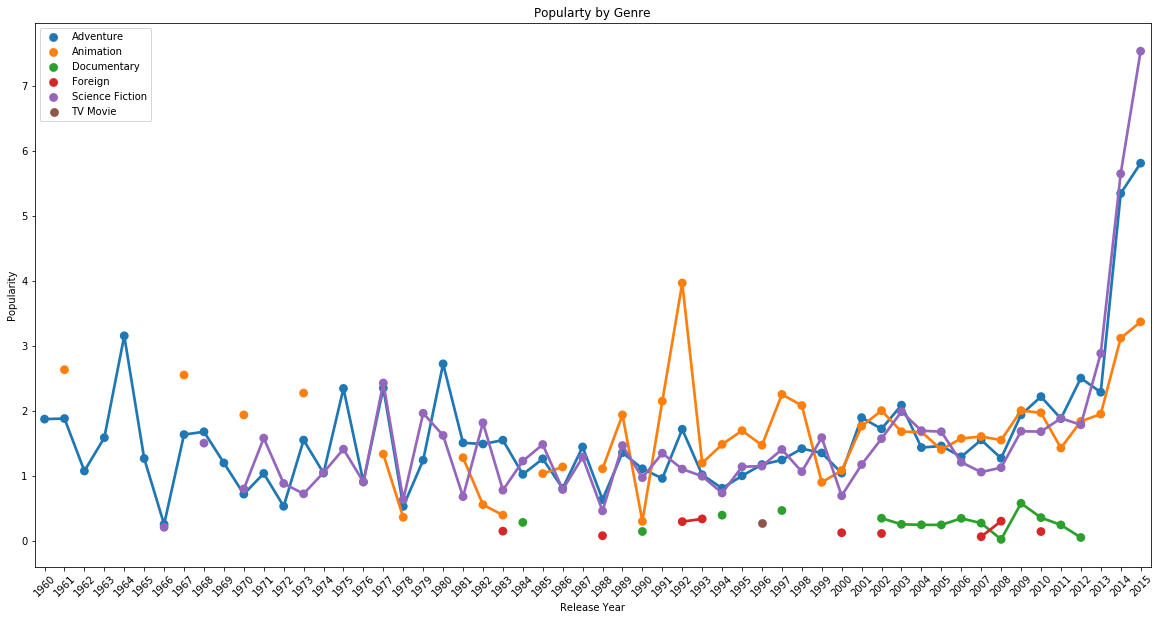

In [49]:
# plot average popularity change year over year for the top and bottom three genres
plot_pop(df_s)

From the plot above, we can see that Science Fiction has gained major popularity increase since around 2013 as well as Adventure, while Animation is more consistent with a few peaks. One the other hand, for the least popular genres, Documentary and Foreign don't experience as much fluctuations year to year, and TV Movie has too little data to be compared in this graph.

Next, let's look at the data since around 2008, when the database started collecting data, for the top 10 most popular genres.

In [50]:
# select the most recent 8 years with data for each genre. for most genres, this will be from 2008 to 1015
pop_yoy_new = pop_yoy.groupby('genre').tail(8) 
# select the top 10 most popular genres
pop_genres = pop_by_genre.genre[:10] 
# select rows in the `pop_yoy_new` dataframe where the `genre` is in the `pop_genres` series
df_n = pop_yoy_new[pop_yoy_new.genre.isin(pop_genres)]

/Users/shiyanzhang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


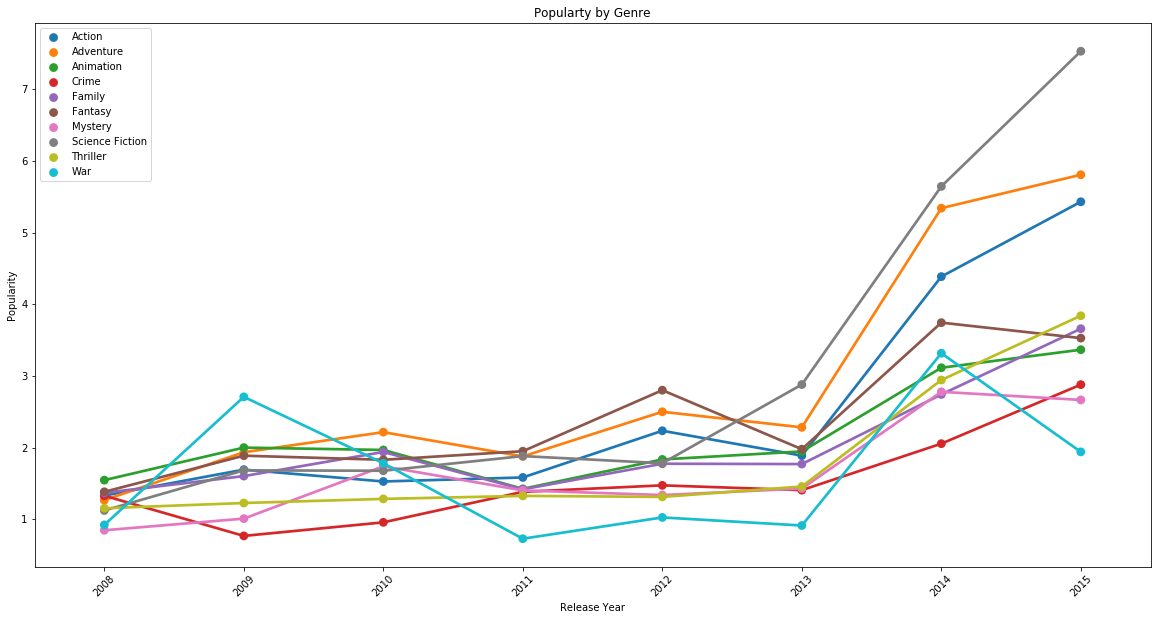

In [51]:
# plot average popularity change since 2008 for the top 10 most popular genres
plot_pop(df_n)

All genres in the top 10 most popular genre list have similar growth trends since 2008 except for War, which is more random. The growth in popularities in recent years may be due to the growth of the movie industry as movie technologies develop and higher quality movies are released. It can also be due to the growth and TMDB's user base as more and more people contribute to the site.

### Research Q3: What was the distribution for release days in terms of month and day of the week? Are there patterns for highly grossing films?

#### First, let's select a subset of data to work with

In [52]:
# select columns that are relevant to this question
df_q3 = df_cleaned[['id','original_title','release_month','release_day_of_week','profit_adj']]

# drop duplicataed rows
df_q3 = df_q3.drop_duplicates()
df_q3.head()

,id,original_title,release_month,release_day_of_week,profit_adj
0,135397,Jurassic World,6,1,1.254446e+09
4,76341,Mad Max: Fury Road,5,2,2.101614e+08
8,262500,Insurgent,3,2,1.704191e+08
11,140607,Star Wars: The Force Awakens,12,1,1.718723e+09
15,168259,Furious 7,4,2,1.210949e+09


#### How was `release_month` and `release_day_of_week` distributed

In [53]:
def release_month_dist(df):
    
    '''plot histogram of the distribution of release month of a given DataFrame'''
    
    bins=range(1,14)
    plt.hist(df['release_month'],bins,align='left',color='teal',alpha=.7)
    plt.title('Release Number by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Releases');

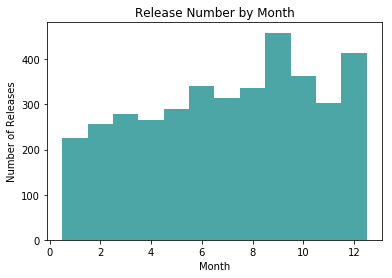

In [54]:
# plot month distribution for the entire dataset
release_month_dist(df_q3)

From the histogram above, we can see that September and December have the most releases. The rest of the year is close to an even distribution. Next, we'll take a look at the distribution of the day of week.

In [55]:
def release_day_dist(df):
    
    '''plot histogram of the distribution of release day of week of a given DataFrame'''
    
    bins_day=range(0,8)
    labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

    plt.hist(df['release_day_of_week'],bins_day,align='left',color='orange',alpha=.7)
    plt.title('Release Number by Day of Week')
    plt.xticks(bins_day, labels)
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Releases');

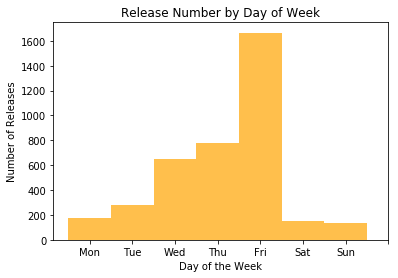

In [56]:
# plot day of week distribution for the entire dataset
release_day_dist(df_q3)

It looks like Friday releases are the most common. The distribution is negatively skewed. Next, let's look at the release day patterns for the top 25% grossing films.

In [57]:
# find threshold for the top 25% grossing films
df_q3.profit_adj.describe()

count    3.849000e+03
mean     9.293772e+07
std      1.941716e+08
min     -4.139124e+08
25%     -1.503317e+06
50%      2.745198e+07
75%      1.075480e+08
max      2.750137e+09
Name: profit_adj, dtype: float64

In [58]:
# filter dataset by profit condition
top_profit = df_q3.query('profit_adj > 1.255390e+08')

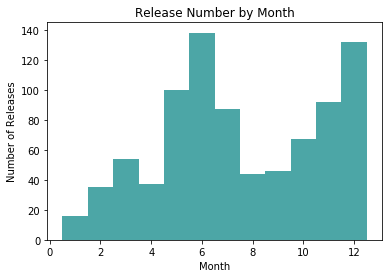

In [59]:
# plot month distribution for the top 25% grossing films
release_month_dist(top_profit)

Compared to the entire dataset, high grossing films tend to release during summer months, especially June, and holiday seasons, particularly December. 

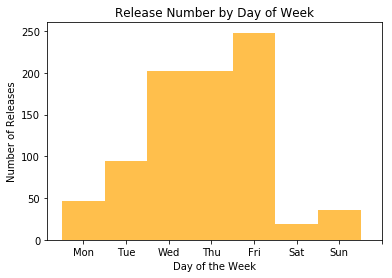

In [60]:
# plot day of week distribution for the top 25% grossing films
release_day_dist(top_profit)

While Friday is still the most common release day for high grossing films, it's not as dominant. We see a fair amount of Wednesday and Thursday releases as well. 

<a id='conclusions'></a>
## Conclusions

After exploring the dataset, we can conclude the following findings:

+ For most genres, there's no obvious relationship between profits and ROIs. However, for the genres with high ROIs, there might be a positive correlation.

+ Directors and artists who are associated with high grossing films are not neccessarily associated with films that have high ROIs.

+ The popularities of most genres fluctuated quite a bit throughout the years with a major increase since around 2013. However, the least popular ones are more consistent.

+ Although there are more film releases in September than any other months, the top grossing films tend to release during summer months and towards end of the year.

+ While most films release on a Friday, for higher grossing films, this pattern is less prominent. 

### Limitation

The exploratory data analysis conducted in this report aims to answer questions based on descriptive calculation. Since no statistical tests were done, all results are tentative and cannot be used to predict population or draw statistical conclusions.

## References

[About TMDB][tmdb]

[Pandas Documentations][pandas]

[Matplotlib Documentations][matplotlib]

[Seaborn Gallery][seaborn]

[Stack Overflow - Widen Display][so-widen display]

[Stack Overflow - Extract from Datetime][so-extract datetime]

[Stack Overflow - Normalize Data][so-normalize data]

[Stack Overflow - Replace Partial Column Values][so-replace]

[Stack Overflow - Groupby Sort Values][so-groupby sort]

[Stack Overflow - Groupby Get Top Records][so-grouby top]

[tmdb]: https://www.themoviedb.org/about
[pandas]: https://pandas.pydata.org/pandas-docs/stable/index.html
[matplotlib]: https://matplotlib.org/index.html
[seaborn]: http://seaborn.pydata.org/examples/index.html
[so-widen display]: https://stackoverflow.com/questions/11707586/python-pandas-how-to-widen-output-display-to-see-more-columns
[so-extract datetime]: https://stackoverflow.com/questions/41918115/how-do-i-extract-the-date-year-month-from-pandas-dataframe
[so-normalize data]: https://stackoverflow.com/questions/39078282/normalizing-data-by-duplication
[so-replace]: https://stackoverflow.com/questions/40716571/pandas-replace-part-of-a-column-with-another-column
[so-groupby sort]: https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
[so-grouby top]: https://stackoverflow.com/questions/20069009/pandas-good-approach-to-get-top-n-records-within-each-group